In [ ]:
!pip install statsmodels --upgrade

     |████████████████████████████████| 9.8 MB 5.1 MB/s 
  Attempting uninstall: statsmodels
    Found existing installation: statsmodels 0.10.2
    Uninstalling statsmodels-0.10.2:
      Successfully uninstalled statsmodels-0.10.2


In [ ]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

In [ ]:
series=pd.read_excel("/content/asus.xlsx")

In [ ]:
series.head()

,event_time,price_asus
0,2020-12-01,14.29
1,2020-12-01,14.29
2,2020-10-09,17.14
3,2020-11-15,17.46
4,2020-10-02,17.46


In [ ]:
series["event_time"]=pd.to_datetime(series["event_time"])

In [ ]:
new_series=series.groupby("event_time").sum()

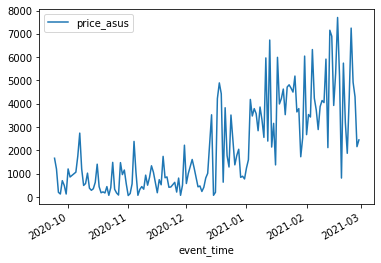

In [ ]:
new_series.plot()

In [ ]:
new_series.isnull().sum()

price_asus    0
dtype: int64

In [ ]:
from statsmodels.tsa.stattools import adfuller

In [ ]:
def adfuller_test(purchase):
    result=adfuller(purchase)
    labels = ['ADF Test Statistic','p-value']
    for value,label in zip(result,labels):
        print(label+' : '+str(value) )
    if result[1] <= 0.05:
        print("strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary")
    else:
        print("weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary ")

In [ ]:
adfuller_test(new_series["price_asus"])

ADF Test Statistic : -1.3269053387018315
p-value : 0.6167749800263848
weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary 


In [ ]:
asus_diff=new_series["price_asus"].diff()

In [ ]:
asus_diff=asus_diff.dropna()

In [ ]:
adfuller_test(asus_diff)

ADF Test Statistic : -8.184492895866349
p-value : 7.967037878265515e-13
strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary


In [ ]:
asus_diff.shape

(152,)

In [ ]:
asus_diff.tail()

event_time
2021-02-24    2992.54
2021-02-25   -2325.69
2021-02-26    -625.55
2021-02-27   -2139.81
2021-02-28     290.28
Name: price_asus, dtype: float64

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf


/usr/local/lib/python3.7/dist-packages/statsmodels/graphics/tsaplots.py:353: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  FutureWarning,


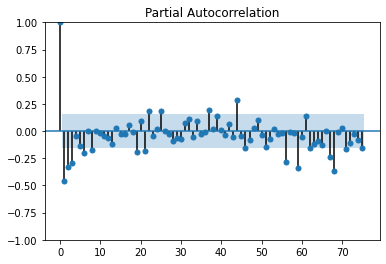

In [ ]:
pacf_plot = plot_pacf(asus_diff,lags=75)


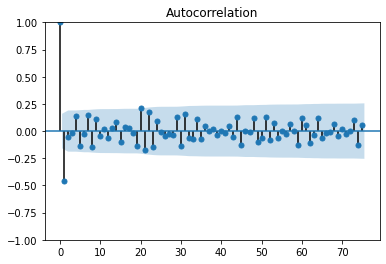

In [22]:
acf_plot = plot_acf(asus_diff, lags = 75)

In [23]:
import statsmodels.api as sm


In [28]:
model1 = sm.tsa.arima.ARIMA(new_series, order=(0,1,1))
result1 = model1.fit()

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [29]:
result1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:             price_asus   No. Observations:                  153
Model:                 ARIMA(0, 1, 1)   Log Likelihood               -1302.416
Date:                Thu, 12 May 2022   AIC                           2608.832
Time:                        07:55:26   BIC                           2614.880
Sample:                             0   HQIC                          2611.289
                                - 153                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.8381      0.035    -23.639      0.000      -0.908      -0.769
sigma2      1.615e+06   1.42e+05     11.405      0.000    1.34e+06    1.89e+06
===================================================================================
Ljung-Box (L1) (Q):                   0.05   Jarque-Bera (JB):                14.87
Prob(Q):                              0.82   Prob(JB):                         0.00
Heteroskedasticity (H):               8.21   Skew:                             0.40
Prob(H) (two-sided):                  0.00   Kurtosis:                         4.31
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [30]:
forecast_1=result1.predict(start=123,end=151,dynamic=True)


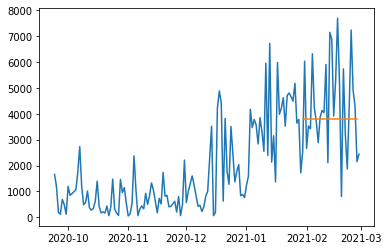

In [31]:
plt.plot(new_series)
plt.plot(forecast_1)
plt.show()

In [65]:
model2=sm.tsa.statespace.SARIMAX(new_series,order=(0, 1, 2),seasonal_order=(0,1,2,31))
results2=model2.fit()

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/statespace/sarimax.py:868: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  ' zeros.' % warning_description)


In [66]:
results2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                         price_asus   No. Observations:                  153
Model:             SARIMAX(0, 1, 2)x(0, 1, 2, 31)   Log Likelihood               -1052.038
Date:                            Thu, 12 May 2022   AIC                           2114.075
Time:                                    08:02:17   BIC                           2128.054
Sample:                                         0   HQIC                          2119.753
                                            - 153                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.8068      0.086     -9.339      0.000      -0.976      -0.637
ma.L2         -0.0736      0.080     -0.916      0.360      -0.231       0.084
ma.S.L31      -0.6727      0.163     -4.139      0.000      -0.991      -0.354
ma.S.L62      -0.3246      0.099     -3.266      0.001      -0.519      -0.130
sigma2      1.617e+06   9.37e-08   1.72e+13      0.000    1.62e+06    1.62e+06
===================================================================================
Ljung-Box (L1) (Q):                   0.03   Jarque-Bera (JB):                 3.51
Prob(Q):                              0.87   Prob(JB):                         0.17
Heteroskedasticity (H):               4.16   Skew:                             0.19
Prob(H) (two-sided):                  0.00   Kurtosis:                         3.75
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 1.99e+30. Standard errors may be unstable.
"""

In [67]:
forecast_2=results2.predict(start=123,end=151,dynamic=True)


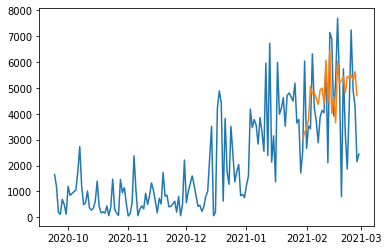

In [68]:
plt.plot(new_series)
plt.plot(forecast_2)
plt.show()

In [69]:
y=new_series.price_asus[123:152]

In [70]:
residuals=forecast_2-y

In [71]:
residuals

event_time
2021-01-30     480.643931
2021-01-31   -2763.856867
2021-02-01     773.566821
2021-02-02     241.619428
2021-02-03    1628.432125
2021-02-04   -1545.254169
2021-02-05     585.063179
2021-02-06     867.775924
2021-02-07    1482.335009
2021-02-08    1043.517537
2021-02-09     862.729590
2021-02-10     345.800288
2021-02-11     167.989441
2021-02-12    2324.840460
2021-02-13    -665.817124
2021-02-14   -2872.428512
2021-02-15     749.057650
2021-02-16   -1645.190509
2021-02-17   -1675.356513
2021-02-18      -4.296948
2021-02-19    4486.035872
2021-02-20    -294.996232
2021-02-21    1615.438428
2021-02-22    3588.628195
2021-02-23    1126.491811
2021-02-24   -1732.268983
2021-02-25     375.079315
2021-02-26    1340.595742
2021-02-27    2556.795692
dtype: float64

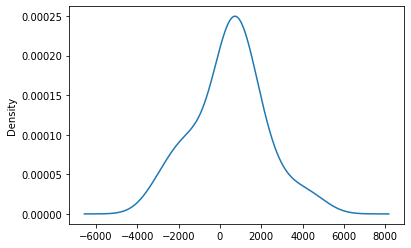

In [72]:
residuals.plot(kind='kde')
plt.show()

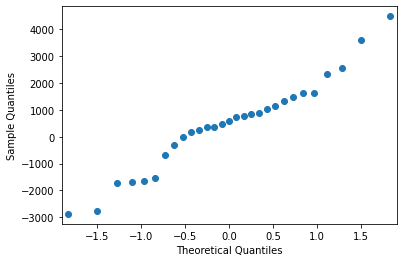

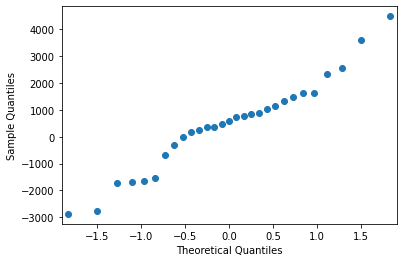

In [73]:
from statsmodels.graphics.gofplots import qqplot
qqplot(residuals)

In [74]:
RSS=sum(residuals**2)

In [75]:
TSS=new_series["price_asus"]-new_series["price_asus"].mean()

In [76]:
TSS_Squared=sum(TSS**2)

In [77]:
r_squared= 1-(RSS/TSS_Squared)

In [78]:
r_squared

0.8463739912259542

In [79]:
from scipy.stats import shapiro

In [80]:
shapiro(residuals)

(0.9671239852905273, 0.4845641255378723)